In [1]:
import numpy as np
from numpy.fft import fft
import pydub
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import bisect
%matplotlib inline

In [2]:
song = Path('merah_putih.ogg')
a = pydub.AudioSegment.from_ogg(song)
y = np.array(a.get_array_of_samples())

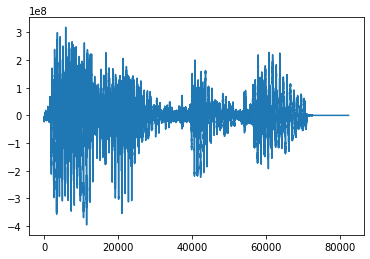

In [3]:
plt.plot(y)
plt.show()

In [4]:
a.frame_rate

48000

In [5]:
y

array([-19376936, -10539465, -18438306, ...,         0,         0,
               0], dtype=int32)

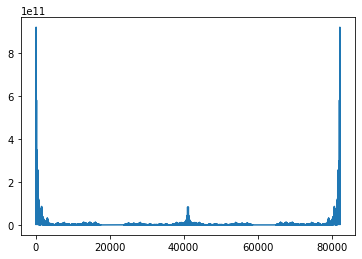

In [6]:
yf = fft(y)
plt.plot(np.abs(yf))
plt.show()

In [7]:
len(y)

82336

In [8]:
f = []
w = 128
for i in range(round(len(y)/w)-1):
    f.append(y[i*w:(i+1)*w-1])
len(f)

642

In [9]:
for i in range(w-1):
    print(i, f[0][i])

0 -19376936
1 -10539465
2 -18438306
3 -13207947
4 -17995870
5 -12909115
6 -23577656
7 -12978429
8 -22788578
9 -13180073
10 -22051578
11 -14901646
12 -21928734
13 -14196553
14 -19087526
15 -12702382
16 -19902334
17 -15161835
18 -19259820
19 -12856374
20 -21043614
21 -12806653
22 -18207900
23 -11667593
24 -15454879
25 -6730796
26 -21379364
27 -10136694
28 -16244224
29 -11182737
30 -12106049
31 -9913476
32 -16425184
33 -11771971
34 -13757798
35 -9200024
36 -14110543
37 -8627463
38 -18782734
39 -11531391
40 -17226140
41 -9497895
42 -16355236
43 -8172450
44 -19125140
45 -8786842
46 -16819890
47 -5551086
48 -16213142
49 -7449990
50 -16657752
51 -8300302
52 -13285777
53 -6117717
54 -15925298
55 -10808116
56 -17761986
57 -8841381
58 -19105246
59 -7111884
60 -19279832
61 -8729686
62 -15307420
63 -5814566
64 -17573520
65 -7395813
66 -15347248
67 -5939742
68 -13058688
69 -5378360
70 -15737063
71 -5726044
72 -14080140
73 -3776019
74 -14137496
75 -7041412
76 -13720851
77 -5348574
78 -15241110
79 -5

In [10]:
np.corrcoef(f[1],f[2])

array([[1.        , 0.26973131],
       [0.26973131, 1.        ]])

In [11]:
c=[]
for i in range(len(f)):
    for j in range(len(f)):
        c.append(np.corrcoef(f[i],f[j]))

/home/marchel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/marchel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [13]:
result = []
for i in range(len(c)):
    result.append(c[i][0][1])
sorted(result)

[-0.9952200431068523,
 -0.9952200431068522,
 -0.9920011925315008,
 -0.9902694205114377,
 -0.9886807976019835,
 -0.987929669409605,
 -0.9879296694096049,
 -0.9877841153516513,
 -0.9865058692360154,
 -0.9863318887904167,
 -0.9861673508356538,
 -0.9857885298987683,
 -0.9846799569636283,
 -0.9845551489887072,
 -0.9843389616265986,
 -0.9835933557917146,
 -0.9834027255191459,
 -0.9826812530201313,
 -0.9826812530201312,
 -0.9826421736151444,
 -0.9826401993396175,
 -0.9824640592226813,
 -0.9824538256323498,
 -0.9822668784381247,
 -0.9818136419187261,
 -0.9816285191910886,
 -0.9815114705421385,
 -0.9811316812910688,
 -0.980335637700105,
 -0.9802933127961653,
 -0.9797834985347991,
 -0.979783498534799,
 -0.979722129861264,
 -0.9793920639190548,
 -0.9793920639190546,
 -0.9793561457155956,
 -0.9793005771571307,
 -0.9793005771571307,
 -0.9786569384258409,
 -0.9785913298715752,
 -0.9785765619637943,
 -0.9784424074269271,
 -0.9784412871540334,
 -0.9784355273981862,
 -0.9781555822866398,
 -0.9780077739

In [14]:
newresult = [x for x in result if str(x) != 'nan']

In [15]:
newresult_sorted = sorted(newresult)

In [16]:
def find_closest_index(a, x):
    i = bisect.bisect_left(a, x)
    if i > len(a):
        i = len(a) - 1
    elif i and a[i] - x > x - a[i - 1]:
        i = i - 1
    return (i, a[i])

In [33]:
print(find_closest_index(newresult_sorted, 0.9999))

(326612, 0.9999999999999998)


In [18]:
print(find_closest_index(newresult_sorted, 0))

(163307, -1.4505437812735909e-05)


In [19]:
print(find_closest_index(newresult_sorted, -1))

(0, -0.9952200431068523)


In [20]:
print(f"Near with 1 : {newresult_sorted[326611]}")

Near with 1 : 0.9903663977731666


In [21]:
print(f"Near +0 : {newresult_sorted[163308]}")

Near +0 : 1.6148366205590756e-05


In [22]:
print(f"Near with -1 : {newresult_sorted[0]}")

Near with -1 : -0.9952200431068523


In [23]:
print(f"Near -0 : {newresult_sorted[163307]}")

Near -0 : -1.4505437812735909e-05


In [34]:
for i in range(len(result)):
    if newresult_sorted[326611] == c[i][0][1]:
        nearpositifone = i
    elif newresult_sorted[0] == c[i][0][1]:
        nearminusone = i
    elif newresult_sorted[163308] == c[i][0][1]:
        nearpositifzero = i
    elif newresult_sorted[163307] == c[i][0][1]:
        nearnegatifzero = i

In [35]:
print(nearpositifone)
print(nearminusone)
print(nearpositifzero)
print(nearnegatifzero)

205752
205759
273134
51404


In [26]:
for i in range(len(f)):
    for j in range(len(f)):
        p = np.corrcoef(f[i],f[j])
        if c[205752][0][1] == p[0][1]:
            i1 = i
            j1 = j
        elif c[205759][0][1] == p[0][1]:
            i2 = i
            j2 = j
        elif c[273134][0][1] == p[0][1]:
            i3 = i
            j3 = j
        elif c[51404][0][1] == p[0][1]:
            i4 = i
            j4 = j

In [27]:
c[205752][0][1]

0.9903663977731666

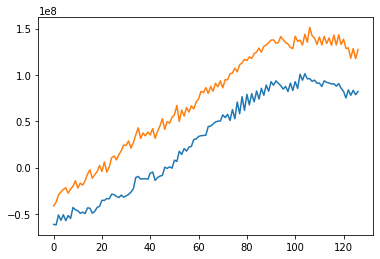

In [28]:
plt.plot(f[i1])
plt.plot(f[j1])

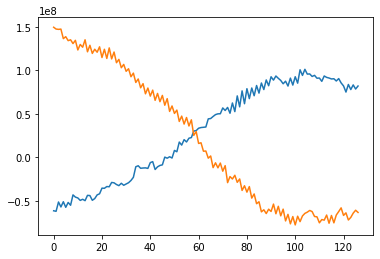

In [29]:
plt.plot(f[i2])
plt.plot(f[j2])

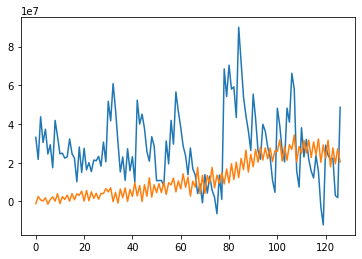

In [30]:
plt.plot(f[i3])
plt.plot(f[j3])

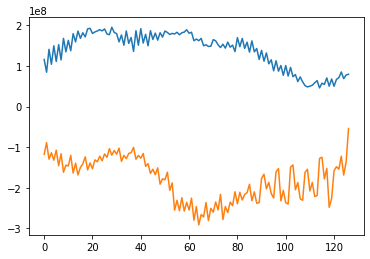

In [31]:
plt.plot(f[i4])
plt.plot(f[j4])